In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet(r"D:\Desktop\spotify_project\0000 (1).parquet")

# Write the DataFrame to a CSV file
df.to_csv("spotify_data.csv", index=False)


In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [6]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df["explicit"]=df["explicit"].astype(int) #True=1 and False=0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  int32  
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
df.shape #(rows, columns)

(114000, 20)

In [10]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [11]:
df = df.dropna(axis=0)

In [12]:
df['track_genre'].nunique() # Checking how many genres are there

114

In [13]:
df[df.duplicated()] # checking duplicate rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,0,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,0,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,0,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,0,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,0,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,0,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,0,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,0,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,0,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [14]:
df.describe().style.background_gradient(cmap="Accent") # Dark boxes denote very high values

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,228031.153387,0.085501,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,107296.057716,0.279627,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8586.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,174066.000000,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,212906.000000,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,261506.000000,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5237295.000000,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


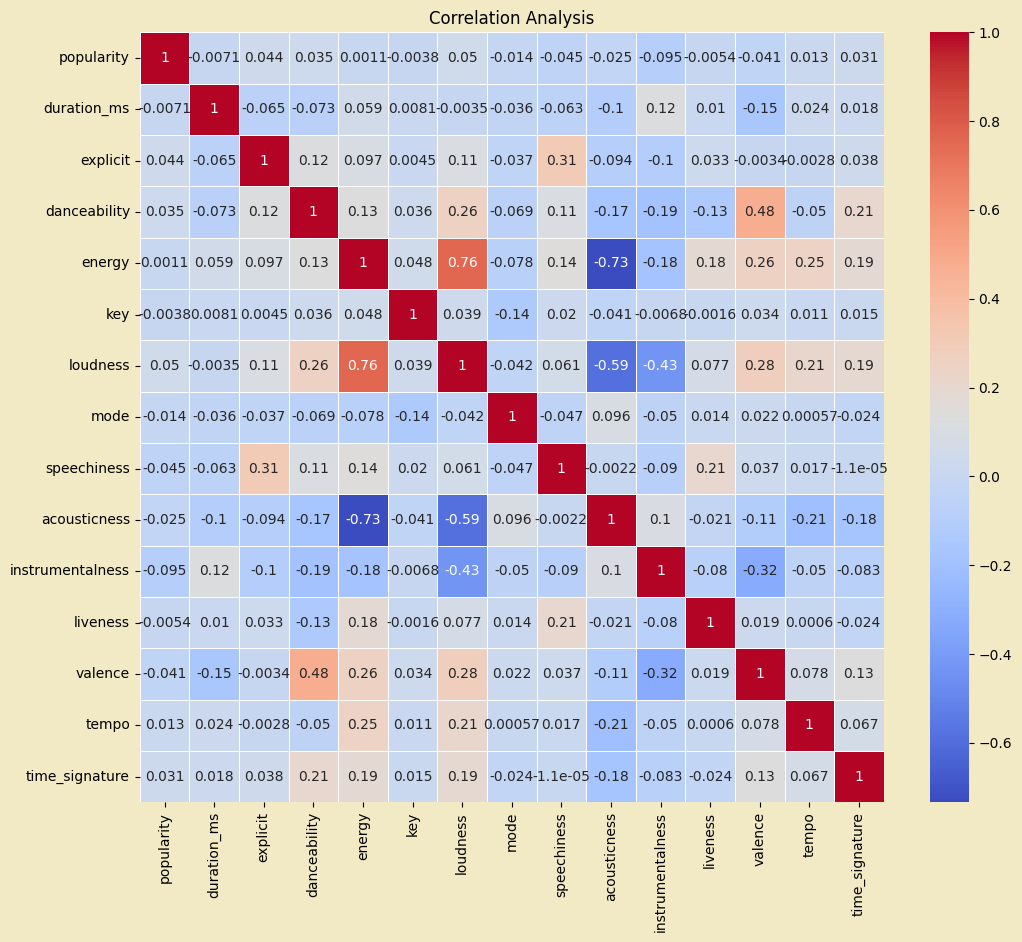

In [15]:
# Including numerical colmumns
corr_mat = df.select_dtypes(include=["int", "float"]).corr()

# Adjusting figure visuals
plt.figure(figsize=(12, 10), facecolor='#F2EAC5', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#F2EAC5')
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()

In [16]:
num_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')| (df.dtypes == 'int32')]]
num_cols.shape

(113999, 15)

In [17]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  int32  
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
dtypes: float64(9), int32(1), int64(5)
memory usage: 13.5 MB


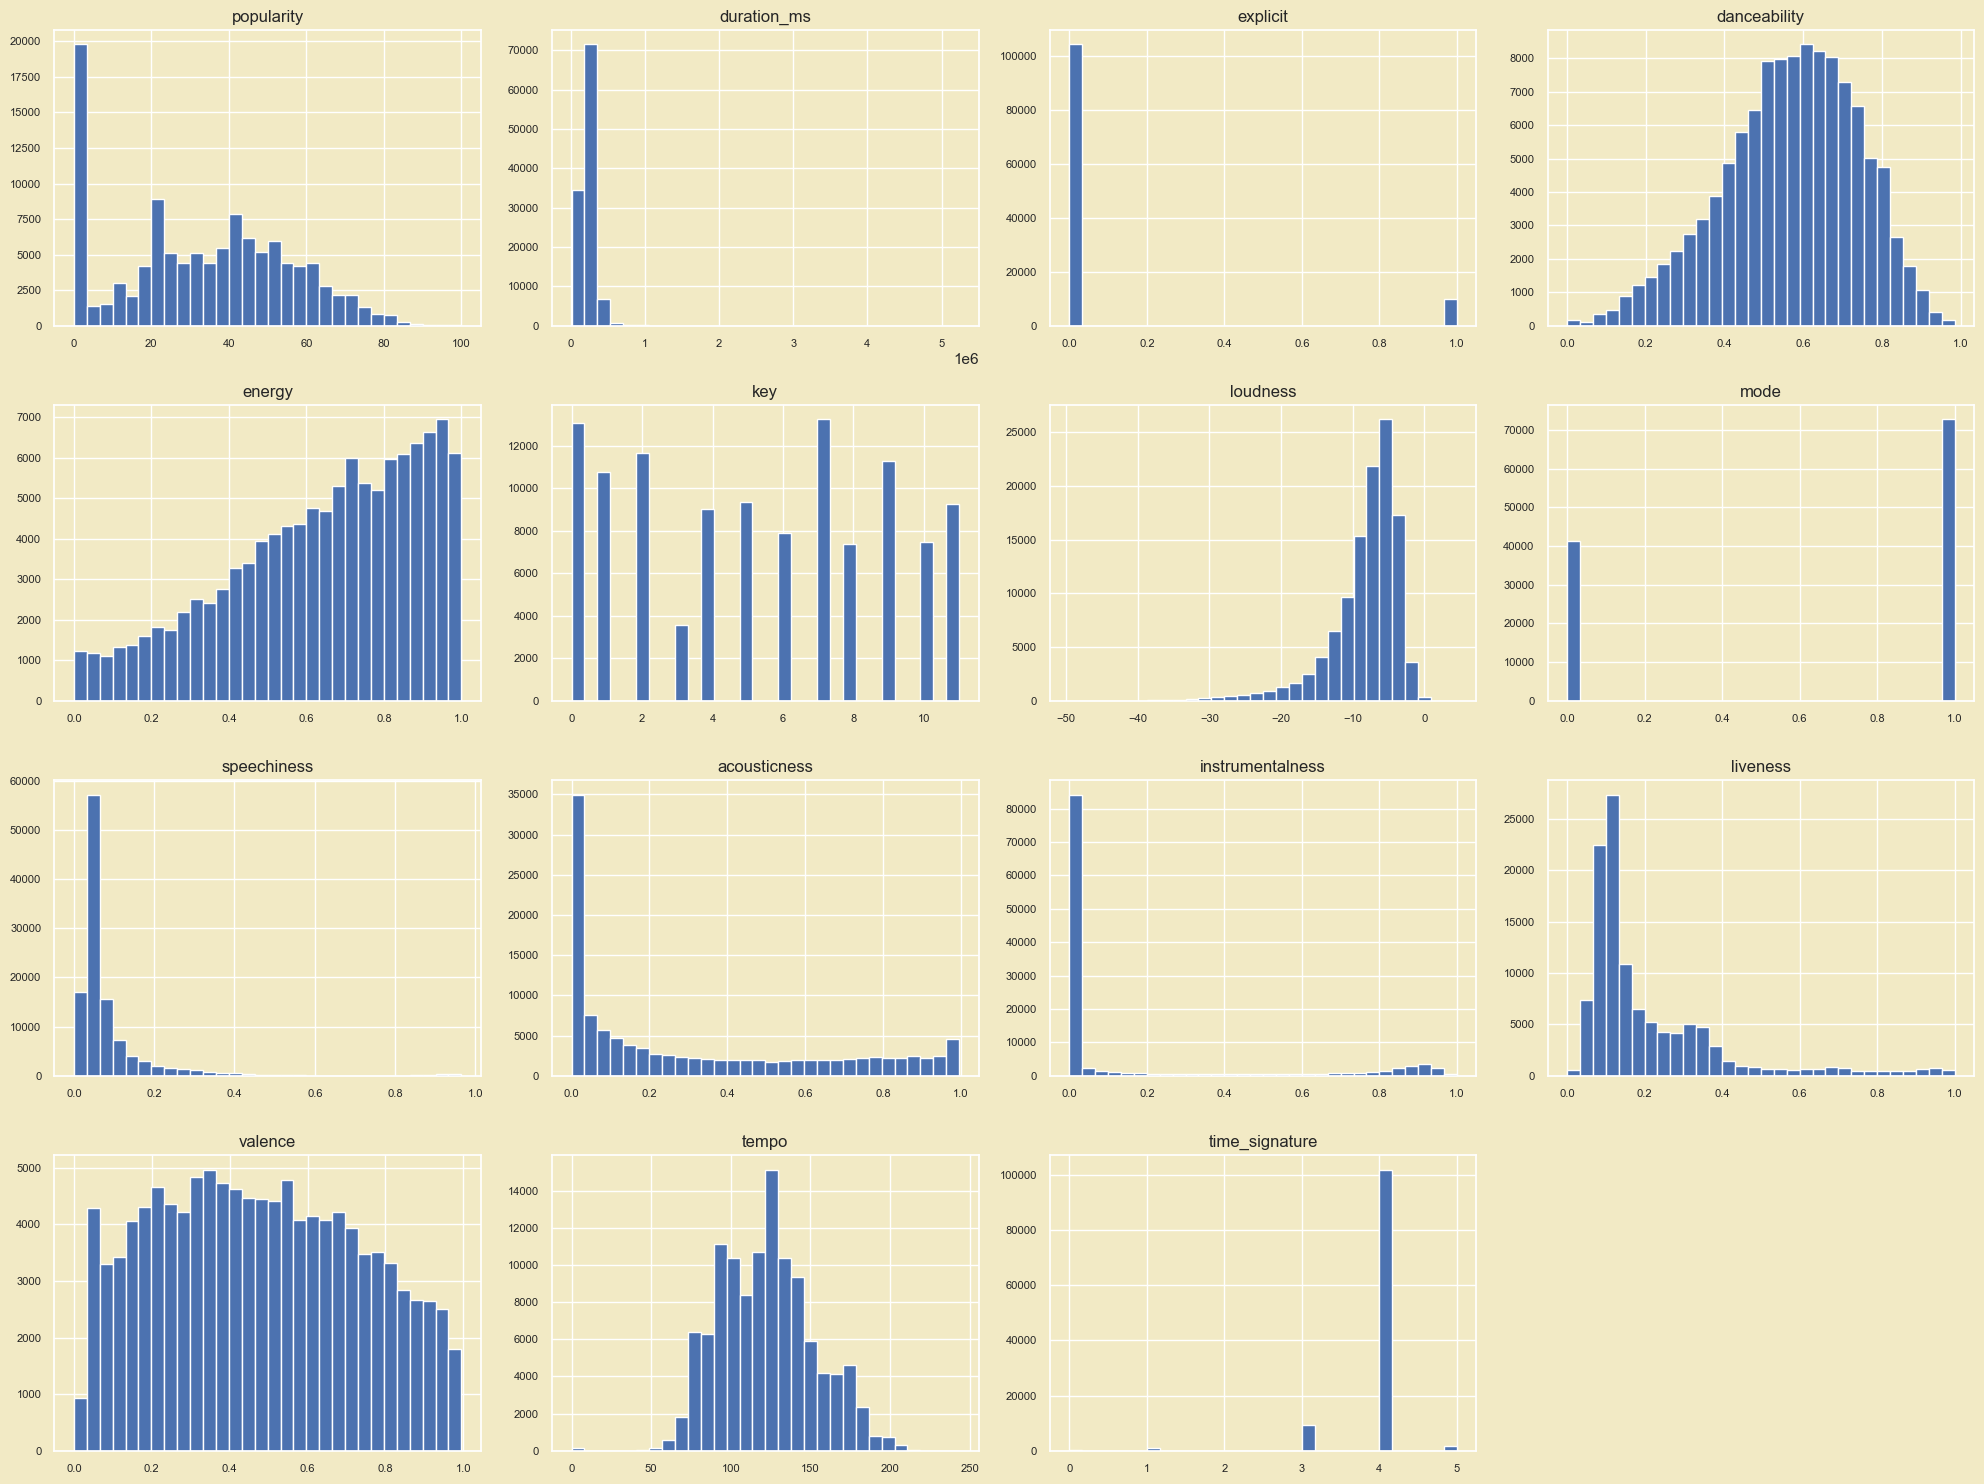

In [18]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [19]:
# Select and scale the relevant features
features = df[['danceability','energy', 'loudness', 'valence', 'tempo']] # features selected by refering correlation matrix 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [21]:
# Genre to category mapping for playlist creation
genre_to_category = {
    # EDM
    'edm': 'Electronic Dance Music', 
    'house': 'Electronic Dance Music', 
    'electro': 'Electronic Dance Music', 
    'trance': 'Electronic Dance Music', 
    'techno': 'Electronic Dance Music', 
    'dubstep': 'Electronic Dance Music', 
    'drum-and-bass': 'Electronic Dance Music', 
    'deep-house': 'Electronic Dance Music', 
    'detroit-techno': 'Electronic Dance Music', 
    'minimal-techno': 'Electronic Dance Music', 
    'progressive-house': 'Electronic Dance Music', 
    'breakbeat': 'Electronic Dance Music',
    
    # Rock
    'alt-rock': 'Rock', 
    'rock': 'Rock', 
    'indie': 'Rock', 
    'indie-pop': 'Rock', 
    'punk': 'Rock', 
    'punk-rock': 'Rock', 
    'hard-rock': 'Rock', 
    'metal': 'Rock', 
    'heavy-metal': 'Rock', 
    'black-metal': 'Rock', 
    'death-metal': 'Rock', 
    'grunge': 'Rock',
    
    # Hip-Hop and R&B
    'hip-hop': 'Hip-Hop and R&B', 
    'r-n-b': 'Hip-Hop and R&B', 
    'trap': 'Hip-Hop and R&B',
    
    # Pop
    'pop': 'Pop', 
    'electro-pop': 'Pop', 
    'synth-pop': 'Pop', 
    'k-pop': 'Pop', 
    'pop-film': 'Pop', 
    'power-pop': 'Pop',
    
    # Latin & Reggae/Dancehall
    'latin': 'Latin & Reggae/Dancehall', 
    'reggaeton': 'Latin & Reggae/Dancehall', 
    'salsa': 'Latin & Reggae/Dancehall', 
    'samba': 'Latin & Reggae/Dancehall', 
    'reggae': 'Latin & Reggae/Dancehall', 
    'dancehall': 'Latin & Reggae/Dancehall',
    
    # Funk and Disco
    'funk': 'Funk and Disco', 
    'disco': 'Funk and Disco', 
    'groove': 'Funk and Disco',
}

# Map each track to a category
df['music_category'] = df['track_genre'].apply(lambda x: genre_to_category.get(x, 'Other'))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int32  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [23]:
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category
33331,5lar0mCUejpILVkAz50s2J,XXXTENTACION,SKINS,Train food,58,164082,1,0.492,0.712,9,...,0,0.6910,0.5640,0.000091,0.3570,0.230,137.453,3,emo,Other
530,3BXMHdrjdF5yjJU4G0Z5HZ,Ethan Loukas;Janine Teñoso,Hanap-Hanap,Hanap-Hanap,29,246644,0,0.663,0.239,9,...,1,0.0308,0.8270,0.000000,0.1090,0.488,83.102,4,acoustic,Other
66505,56tuLaSY1SJtoDk8AEYRSb,Have Fun Teaching,Counting Songs,Counting by Tens Song,12,160363,0,0.815,0.421,7,...,1,0.0823,0.0125,0.000473,0.2880,0.514,109.981,4,kids,Other
98767,3htltNO4tCC386MRjMXQr1,Mark Seibert;Willemijn Verkaik,Musicalballads: Unplugged,Solang ich Dich hab (As Long As You're Mine) -...,22,221026,0,0.478,0.490,5,...,1,0.0342,0.5590,0.000000,0.1200,0.241,123.876,4,show-tunes,Other
5845,70mFYCUkdIQwjP7g4GVrsu,Keyblade,Yūgen,Yūgen,33,251846,0,0.728,0.740,4,...,0,0.1890,0.4620,0.000000,0.0534,0.886,94.915,4,anime,Other


In [24]:
#music categories for different playlists
df['music_category'].unique() 

array(['Other', 'Rock', 'Electronic Dance Music',
       'Latin & Reggae/Dancehall', 'Funk and Disco', 'Hip-Hop and R&B',
       'Pop'], dtype=object)

In [25]:
#Clustering songs in different playlists

kmeans = KMeans(n_clusters=7, random_state=48) 
df['cluster'] = kmeans.fit_predict(scaled_features)

In [26]:
#PCA for visualisation
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

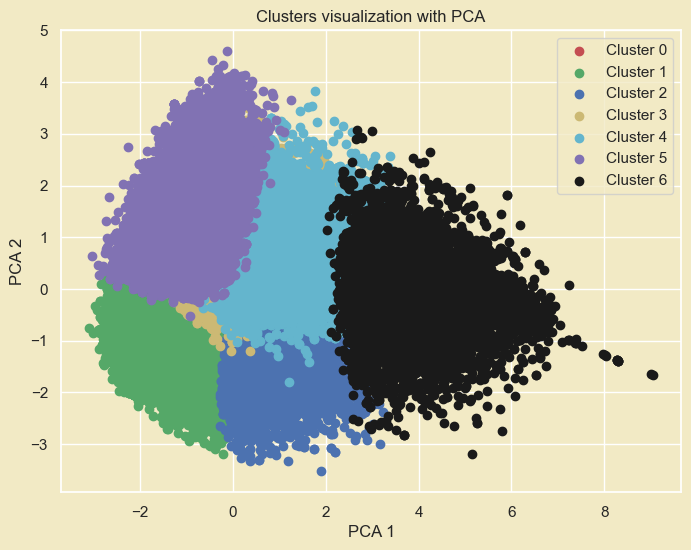

In [27]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']  # Colors for the clusters

# Plot each cluster
for i in range(7):
    
    idx = df['cluster'] == i
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], c=colors[i], label=f'Cluster {i}')

# Adjust visuals
plt.title('Clusters visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
mood_labels = ['Other', 'Rock', 'Electronic Dance Music',
       'Latin & Reggae/Dancehall', 'Funk and Disco', 'Hip-Hop and R&B',
       'Pop']  
df['music_category'] = df['cluster'].apply(lambda x: mood_labels[x])

In [29]:
df['music_category'].value_counts() # check clusters

music_category
Rock                        29689
Hip-Hop and R&B             17925
Other                       17903
Electronic Dance Music      16358
Latin & Reggae/Dancehall    13918
Funk and Disco              11194
Pop                          7012
Name: count, dtype: int64

In [30]:
df['cluster'].value_counts()

cluster
1    29689
5    17925
0    17903
2    16358
3    13918
4    11194
6     7012
Name: count, dtype: int64

In [31]:
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category,cluster
26075,5sN2QKdhiOKaZX9HV5P4si,Tsunehiko Kamijyou,The Little Mermaid (Original Motion Picture So...,Kiss the Girl - Japanese Version,34,161773,0,0.614,0.272,0,...,0.0372,0.678000,0.000000,0.0883,0.663,134.979,4,disney,Electronic Dance Music,2
95246,08izdMh6SFTxOd5ekY7QKU,Maelo Ruiz,Exitos Originales,La Primera Noche,34,292973,0,0.750,0.602,8,...,0.0357,0.435000,0.000000,0.0954,0.940,92.593,4,salsa,Rock,1
78957,1TMzg9zP0IjG5SRl9byG7e,Ikke Hüftgold;Willi Herren,"Vor, zurück","Vor, zurück",23,198857,0,0.606,0.933,8,...,0.0921,0.138000,0.000062,0.3710,0.556,139.989,4,party,Hip-Hop and R&B,5
96395,1WsPeKmEE0NSgq6F3y2Ot6,Belchior,2 é Demais,Medo de avião,41,145560,0,0.430,0.708,7,...,0.0309,0.402000,0.000000,0.4070,0.552,86.033,4,samba,Latin & Reggae/Dancehall,3
61698,0G8qBkiMnmyM0VF1SJqDbR,BiS,Brand-new idol Society,BiS-どうやらゾンビのおでまし-,20,302834,0,0.395,0.922,5,...,0.0446,0.000037,0.245000,0.1600,0.388,95.005,4,j-idol,Latin & Reggae/Dancehall,3


In [32]:
df.to_csv('spotify_with_categories.csv', index=False) #saving new file with added columns

In [33]:
# Select features and target variable
X = num_cols
y = df['music_category']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=0)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}\n")

# The Model will now classify new data into playlists

Random Forest Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.95      0.95      0.95      6640
          Funk and Disco       0.96      0.93      0.95      4584
         Hip-Hop and R&B       0.97      0.97      0.97      7118
Latin & Reggae/Dancehall       0.96      0.95      0.96      5541
                   Other       0.96      0.96      0.96      7078
                     Pop       0.97      0.98      0.97      2795
                    Rock       0.97      0.98      0.98     11844

                accuracy                           0.96     45600
               macro avg       0.96      0.96      0.96     45600
            weighted avg       0.96      0.96      0.96     45600


SVM Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.97      0.97      0.97      6640
          Funk and Disco       0.97      0.96      0.97      4584
       

In [35]:
# Cross Validation to validate if the models created are good

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(random_state=0)
}

# Apply cross-validation and print the results
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

K-Nearest Neighbors Accuracy: 0.85 (+/- 0.02)
Decision Tree Accuracy: 0.94 (+/- 0.01)
Random Forest Accuracy: 0.96 (+/- 0.01)
SVM Accuracy: 0.97 (+/- 0.01)


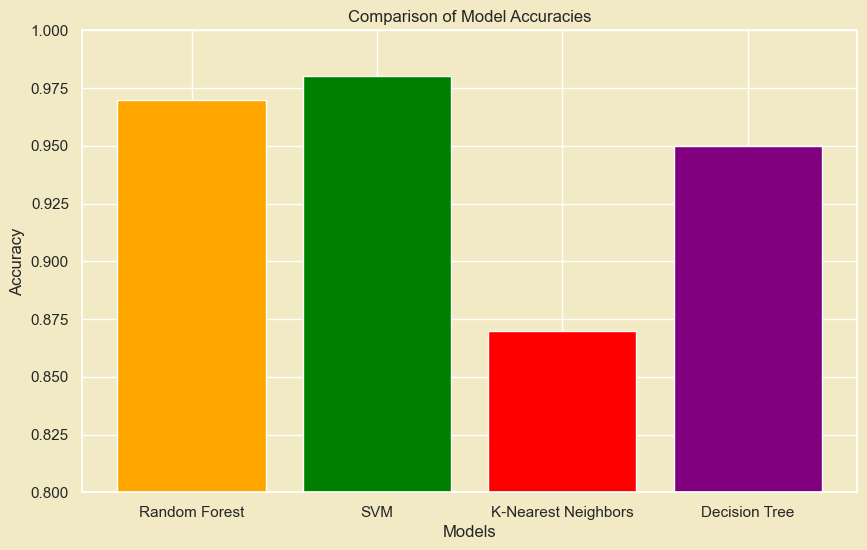

In [36]:
model_accuracies = {
    'Random Forest': 0.97,
    'SVM': 0.98,
    'K-Nearest Neighbors': 0.87,
    'Decision Tree': 0.95
}

# Creating the comparison chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['orange', 'green', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  
plt.show()

In [37]:

#x,y spliting
X = num_cols
y = df['music_category']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=0)

model_1= SVC(random_state=0).fit(X_train,y_train)
y_pred= model_1.predict(X_test)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(f"{name} Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}\n")

SVM Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.97      0.97      0.97      6640
          Funk and Disco       0.97      0.96      0.97      4584
         Hip-Hop and R&B       0.98      0.98      0.98      7118
Latin & Reggae/Dancehall       0.97      0.96      0.96      5541
                   Other       0.97      0.97      0.97      7078
                     Pop       0.98      0.98      0.98      2795
                    Rock       0.98      0.99      0.98     11844

                accuracy                           0.97     45600
               macro avg       0.97      0.97      0.97     45600
            weighted avg       0.97      0.97      0.97     45600




In [40]:
# Save the trained model to a pickle file
with open("model_1.pkl", "wb") as file:
    pickle.dump(model_1, file)

print("Model saved successfully!")

Model saved successfully!


In [42]:
# Load the model from the pickle file
with open("model_1.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Verify the loaded model works by making a prediction
print("Sample prediction with loaded model:", loaded_model.predict([X_test[1]]))

Sample prediction with loaded model: [0]
